# Task 2

Import Needed Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

Load the data

In [3]:
data = pd.read_csv("first inten project.csv")
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


1 - Data Preprocessing (Check Null , Data Type , See The correct Form of the data if there any white
space for example or not)

In [3]:
data = data.drop_duplicates(subset=["Booking_ID"]) #Remove dublicates based on Booking ID

data.rename(columns={"average price ":"average price"},inplace=True) # Remove white space

for i in range(len(data["date of reservation"])): #Fix inconsistent values in date and fix datatype
    try:
        data["date of reservation"][i] = (pd.to_datetime(data["date of reservation"][i]))
    except:
        try:
            (pd.to_datetime(data["date of reservation"][i],format="%Y-%m-%d"))
            data["date of reservation"][i] = (pd.to_datetime(data["date of reservation"][i],format="%Y-%m-%d"))
        except:
            data["date of reservation"][i] = '2018-2-28'
            data["date of reservation"][i] = (pd.to_datetime(data["date of reservation"][i],format="%Y-%m-%d"))


In [ ]:
has_null = data.isnull().values.any() 
print(f"DataFrame has null values: {has_null}") #check for null (should be = False)

# Handle missing values if any
num_rows_with_nan = data.isna().any(axis=1).sum()
print(f"DataFrame has null values: {num_rows_with_nan}")
if num_rows_with_nan:
  data.dropna(inplace=True)


print(data["booking status"].unique()) #check for enteries to check if there is wrong one out of unique known ones (should be = ['Not_Canceled' 'Canceled'])

DataFrame has null values: False
DataFrame has null values: 0
['Not_Canceled' 'Canceled']


In [5]:
# Label Encoding for ['type of meal','room type','market segment type'] columns

data_encoded = data
le = LabelEncoder()
for d in ['type of meal','room type','market segment type']:
    data_encoded[d] = le.fit_transform(data[d])
data_encoded.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,2015-10-02 00:00:00,Not_Canceled
1,INN00002,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,2018-11-06 00:00:00,Not_Canceled
2,INN00003,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,2018-02-28 00:00:00,Canceled
3,INN00004,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,2017-05-20 00:00:00,Canceled
4,INN00005,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,2018-04-11 00:00:00,Canceled


In [6]:
#fix formate of date of reservation to int64
data_encoded["date of reservation"] = pd.to_datetime(data_encoded["date of reservation"])
data_encoded["date of reservation"] = data_encoded["date of reservation"].astype('int64') // 10**9  # to seconds

# drop columns that are irrelavent
data_encoded = data_encoded.drop(columns=["Booking_ID","repeated"], errors='ignore')
data_encoded.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,0,0,0,224,3,0,0,88.00,0,1443744000,Not_Canceled
1,1,0,1,3,3,0,0,5,4,0,0,106.68,1,1541462400,Not_Canceled
2,2,1,1,3,0,0,0,1,4,0,0,50.00,0,1519776000,Canceled
3,1,0,0,2,0,0,0,211,4,0,0,100.00,1,1495238400,Canceled
4,1,0,1,2,3,0,0,48,4,0,0,77.00,0,1523404800,Canceled


2 - Check And Handel The Outliers Using IQR or Z-Score based on skewness

In [7]:
#check for skewness 
numeric_columns = ["lead time", "average price", "date of reservation" ]
outliers = pd.DataFrame()

for column in numeric_columns:
    
    skewness_value = data_encoded[column].skew()
    skewness_value = np.abs(skewness_value)
    
    if(skewness_value < 0.5): # use Z-Score
        z_scores = zscore(data_encoded[column])
        z_scores = np.abs(z_scores)
        outliers = pd.concat([outliers,data_encoded.loc[z_scores>4,column]],axis=1)
        
    else: # use IQR
        #check outliers for average price
        Q1 = data_encoded[column].quantile(0.25)
        Q3 = data_encoded[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # print(f"Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}")
        outliers = pd.concat([outliers,data_encoded.loc[((data_encoded[column] < lower_bound) | (data_encoded[column] > upper_bound)),column]],axis=1)

print("Number of ouliers = ", outliers.shape[0])
data_filtered = data_encoded.drop(outliers.index)
        

Number of ouliers =  3018


3 - Feature Engineering ( Feature Selection , Feature Extraction )

In [8]:
# Display Correlation Matrix for features that are highly correlated with correlation coefficient > 0.8

#save tarhet output for future use
data_labels = data_filtered["booking status"]
data_filtered = data_filtered.drop(columns="booking status")

corr_matrix = data_filtered.corr()
corr_matrix = corr_matrix.abs()
# print(corr_matrix)
high_corr_pairs = []

for column in corr_matrix.columns:
    for item in corr_matrix[column]:
        if item == 1:
            continue
        if (item>0.8):
            high_corr_pairs.append(column)

# print(high_corr_pairs)
data_filtered = data_filtered.drop(columns=high_corr_pairs)
data_filtered.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,P-C,P-not-C,average price,special requests,date of reservation
1,1,0,1,3,3,0,0,5,4,0,0,106.68,1,1541462400
2,2,1,1,3,0,0,0,1,4,0,0,50.00,0,1519776000
3,1,0,0,2,0,0,0,211,4,0,0,100.00,1,1495238400
4,1,0,1,2,3,0,0,48,4,0,0,77.00,0,1523404800
6,1,1,1,4,0,0,0,34,4,0,0,107.55,1,1508025600


In [9]:
# Create new features
data_filtered['stay_duration'] = data_filtered['number of weekend nights'] + data_filtered['number of week nights']
data_filtered['total_guests'] = data_filtered['number of adults'] + data_filtered['number of children']


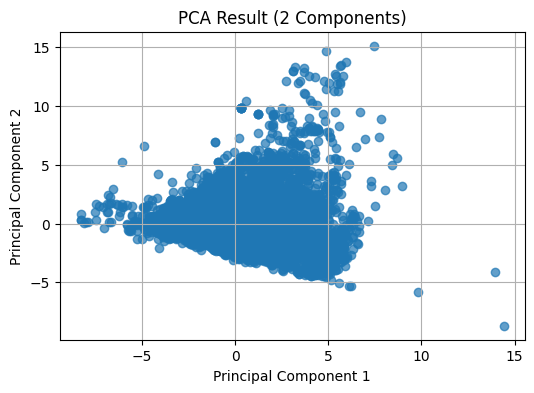

In [10]:
# Feature Extraction using PCA

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot the PCA result
plt.figure(figsize=(6, 4))
plt.scatter(data_pca[:, 0], data_pca[:, 1],alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result (2 Components)')
plt.grid(True)
plt.show()

4 - Transformation For The Categorical Data

In [ ]:
#save target output for future use
data_labels = le.fit_transform(data_labels)

5 - Train Test Split

In [12]:
X_train, X__, y_train, y__ = train_test_split(data_pca, data_labels, test_size=0.2, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(X__, y__, test_size=0.5, random_state=42)
del(X__,y__)

6 - Modeling And Accuracy Calculation using sklearn LogisticRegression

6.1 - Losgistic Regression model

In [13]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

print(f"Accuracy on training set: {lr_model.score(X_train, y_train)*100:.2f}%") # Calculate accuracy of training data
print(f"Accuracy on CV set: {lr_model.score(X_cv, y_cv)*100:.2f}%") # Calculate accuracy of CV data
print(f"Accuracy on testing set: {lr_model.score(X_test, y_test)*100:.2f}%") # Calculate accuracy of testing data


Accuracy on training set: 68.67%
Accuracy on CV set: 69.13%
Accuracy on testing set: 70.30%


In [14]:
# adding polynominal features and scalling data to improve accuracy

models = []
polys = []
scalers = []
train_mses=[]
cv_mses=[]

for degree in range(1,10):
    #Poly
    poly = PolynomialFeatures(degree=degree,include_bias=False)
    X_train_mapped = poly.fit_transform(X_train)
    polys.append(poly)
    
    #scaler
    scaler = StandardScaler()
    X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
    scalers.append(scaler)
    
    #model
    model = LogisticRegression()
    model.fit(X_train_mapped_scaled,y_train)
    models.append(model)
    
    #Get training mse
    y_predict = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train,y_predict) / 2
    train_mses.append(train_mse)
    
    #Get CV mse
    X_cv_mapped = poly.transform(X_cv)
    X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
    y_predict = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv,y_predict) / 2
    cv_mses.append(cv_mse)


# Get the degree with lowest CV MSE
degree = np.argmin(cv_mses)+1
print(f"Lowest CV MSE is found in the model with degree = {degree}")

# Get the accuracy based of testing data with the best degree

X_train_mapped = polys[degree-1].transform(X_train)
X_train_mapped_scaled = scalers[degree-1].transform(X_train_mapped)

X_cv_mapped = polys[degree-1].transform(X_cv)
X_cv_mapped_scaled = scalers[degree-1].transform(X_cv_mapped)
    
X_test_mapped = polys[degree-1].transform(X_test)
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)



print(f"Accuracy on training set: {models[degree-1].score(X_train_mapped_scaled, y_train)*100:.2f}%") # Calculate accuracy of training data
print(f"Accuracy on CV set: {models[degree-1].score(X_cv_mapped_scaled, y_cv)*100:.2f}%") # Calculate accuracy of CV data
print(f"Accuracy on testing set: {models[degree-1].score(X_test_mapped_scaled, y_test)*100:.2f}%") # Calculate accuracy of testing data


Lowest CV MSE is found in the model with degree = 2
Accuracy on training set: 68.68%
Accuracy on CV set: 69.19%
Accuracy on testing set: 70.24%


6.2 - Decision Tree model

In [15]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
print(f"Accuracy on training set: {dt_model.score(X_train, y_train)*100:.2f}%") # Calculate accuracy of training data
print(f"Accuracy on CV set: {dt_model.score(X_cv, y_cv)*100:.2f}%") # Calculate accuracy of CV data
print(f"Accuracy on testing set: {dt_model.score(X_test, y_test)*100:.2f}%") # Calculate accuracy of testing data


Accuracy on training set: 99.47%
Accuracy on CV set: 74.96%
Accuracy on testing set: 75.41%


6.3 - Gradient Boosting Classifier

In [16]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=15, random_state=0)
gb_model.fit(X_train,y_train)
print(f"Accuracy on training set: {gb_model.score(X_train, y_train)*100:.2f}%") # Calculate accuracy
print(f"Accuracy on CV set: {gb_model.score(X_cv, y_cv)*100:.2f}%") # Calculate accuracy
print(f"Accuracy on testing set: {gb_model.score(X_test, y_test)*100:.2f}%") # Calculate accuracy


Accuracy on training set: 94.82%
Accuracy on CV set: 78.06%
Accuracy on testing set: 78.81%


6.4 - Random Forest Classifier

In [17]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
print(f"Accuracy on training set: {rf_model.score(X_train, y_train)*100:.2f}%") # Calculate accuracy
print(f"Accuracy on CV set: {rf_model.score(X_cv, y_cv)*100:.2f}%") # Calculate accuracy
print(f"Accuracy on testing set: {rf_model.score(X_test, y_test)*100:.2f}%") # Calculate accuracy


Accuracy on training set: 99.47%
Accuracy on CV set: 78.51%
Accuracy on testing set: 79.80%


# Task 3

1 - Hyperparameter Tuning

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.metrics import accuracy_score

1.1 - Hyperparameter Tuning for Logistic Regression
- C	Inverse of regularization strength. Smaller values mean stronger regularization. (Default = 1.0)
- penalty	Type of regularization: 'l1', 'l2', 'elasticnet', or 'none'
- solver	Algorithm used to solve optimization: 'liblinear', 'saga', 'newton-cg', 'lbfgs', etc.
- max_iter	Maximum number of iterations for the solver to converge

In [19]:
# Use Random search instead of Grid search to avoid long searching time

# parameters to be tuned:
params = {
    'C': loguniform(0.001, 100),
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'max_iter' : [100, 200, 500],
}


random_search = RandomizedSearchCV(LogisticRegression(),param_distributions=params, n_iter=100,scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train_mapped_scaled,y_train)

print("Best parameters:", random_search.best_params_)

print(f"Accuracy on training set: {random_search.best_score_*100:.2f}%") # Calculate accuracy

y_pred = random_search.predict(X_cv_mapped_scaled)
print(f"Accuracy on CV set: {accuracy_score(y_cv, y_pred)*100:.2f}%") # Calculate accuracy

y_pred = random_search.predict(X_test_mapped_scaled)
print(f"Accuracy on Testing set: {accuracy_score(y_test, y_pred)*100:.2f}%") # Calculate accuracy

Best parameters: {'C': 0.004870849610200301, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy on training set: 68.76%
Accuracy on CV set: 69.16%
Accuracy on Testing set: 70.45%


1.2 - Hyperparameter Tuning for Decision Tree
- criterion	Function to measure the quality of a split: "gini" (default) or "entropy".
- max_depth	Maximum depth of the tree. Limits overfitting by preventing trees from growing too deep.
- min_samples_split	Minimum number of samples required to split an internal node. Higher values = more conservative splits.
- min_samples_leaf	Minimum number of samples required to be at a leaf node. Prevents overfitting to noise.
- max_leaf_nodes	Limits the number of leaf nodes. Helps with pruning the tree.
- max_features	Number of features to consider when looking for the best split. Can be "auto", "sqrt", "log2", or an int/float.

In [20]:
# Use Random search instead of Grid search to avoid long searching time

# parameters to be tuned:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30, 50, 100],
    'min_samples_split': [2, 5, 10, 20, 30, 50],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2'],
}


random_search = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=params, n_iter=50,scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train,y_train)

print("Best parameters:", random_search.best_params_)

print(f"Accuracy on training set: {random_search.best_score_*100:.2f}%") # Calculate accuracy

y_pred = random_search.predict(X_cv)
print(f"Accuracy on CV set: {accuracy_score(y_cv, y_pred)*100:.2f}%") # Calculate accuracy

y_pred = random_search.predict(X_test)
print(f"Accuracy on Testing set: {accuracy_score(y_test, y_pred)*100:.2f}%") # Calculate accuracy



Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 100, 'criterion': 'gini'}
Accuracy on training set: 74.25%
Accuracy on CV set: 75.62%
Accuracy on Testing set: 76.19%


1.3 - Hyperparameter Tuning for Gradient Boosting Classifier
- n_estimators	Number of boosting stages (trees)
- learning_rate	Shrinks contribution of each tree
- max_depth	Max depth of individual trees	
- min_samples_split	Minimum samples needed to split a node
- min_samples_leaf	Minimum samples required at a leaf node
- subsample	Fraction of samples used per tree (for randomness)
- max_features	Max number of features per tree (auto, sqrt, log2, or int/float)

In [21]:
# Use Random search instead of Grid search to avoid long searching time
# parameters to be tuned:
params = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'subsample': [0.7, 1.0],
    'max_features': [None, 'sqrt', 'log2'],
}


random_search = RandomizedSearchCV(GradientBoostingClassifier(),param_distributions=params, n_iter=10,scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train,y_train)

print("Best parameters:", random_search.best_params_)

print(f"Accuracy on training set: {random_search.best_score_*100:.2f}%") # Calculate accuracy

y_pred = random_search.predict(X_cv)
print(f"Accuracy on CV set: {accuracy_score(y_cv, y_pred)*100:.2f}%") # Calculate accuracy

y_pred = random_search.predict(X_test)
print(f"Accuracy on Testing set: {accuracy_score(y_test, y_pred)*100:.2f}%") # Calculate accuracy



Best parameters: {'subsample': 0.7, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'learning_rate': 0.1}
Accuracy on training set: 77.13%
Accuracy on CV set: 77.88%
Accuracy on Testing set: 78.75%


1.4 - Hyperparameter Tuning for Random Forest Classifier
- n_estimators	Number of trees in the forest	
- criterion	Function to measure the quality of a split	
- max_depth	Maximum depth of each tree	
- min_samples_split	Minimum number of samples required to split a node	
- min_samples_leaf	Minimum number of samples required at a leaf node	
- max_features	Number of features to consider when looking for the best split	
- bootstrap	Whether bootstrap samples are used when building trees	

In [22]:
# Use Random search instead of Grid search to avoid long searching time
# parameters to be tuned:
params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(RandomForestClassifier(),param_distributions=params, n_iter=10,scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train,y_train)

print("Best parameters:", random_search.best_params_)

print(f"Accuracy on training set: {random_search.best_score_*100:.2f}%") # Calculate accuracy

y_pred = random_search.predict(X_cv)
print(f"Accuracy on CV set: {accuracy_score(y_cv, y_pred)*100:.2f}%") # Calculate accuracy

y_pred = random_search.predict(X_test)
print(f"Accuracy on Testing set: {accuracy_score(y_test, y_pred)*100:.2f}%") # Calculate accuracy



Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Accuracy on training set: 77.45%
Accuracy on CV set: 78.72%
Accuracy on Testing set: 79.26%


2 - Try one or more feature selection method to optimize model accuracy
* using Logistic Regression Classifier as our classification model

2.1 PCA

In [46]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

X_train, X_test, y_train, y_test = train_test_split(data_pca, data_labels, test_size=0.2, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

print(f"Accuracy on training set: {lr_model.score(X_train, y_train)*100:.2f}%") # Calculate accuracy of training data
print(f"Accuracy on testing set: {lr_model.score(X_test, y_test)*100:.2f}%") # Calculate accuracy of testing data

Accuracy on training set: 68.67%
Accuracy on testing set: 69.73%


2.2 Sequential Feature Selection (SFS)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [33]:
model = LogisticRegression(max_iter=500)

sfs = SequentialFeatureSelector(model,n_features_to_select=5,direction='forward', scoring='accuracy', cv=5, n_jobs=-1)

data_train, data_test, labels_train, labels_test = train_test_split(data_filtered,data_labels,test_size=0.2,random_state=68)
sfs.fit(data_train,labels_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=500),
                          n_features_to_select=5, n_jobs=-1,
                          scoring='accuracy')

In [ ]:
selected_features_mask = sfs.get_support()
selected_features = data_train.columns[selected_features_mask]
print("Selected features: ", list(selected_features))

data_train_selected = data_train[selected_features]
data_test_selected = data_test[selected_features]

model.fit(data_train_selected,labels_train)

print(f"Accuracy of training data with selected features: {model.score(data_train_selected, labels_train)*100:.2f}%")
print(f"Accuracy of testing data with selected features: {model.score(data_test_selected, labels_test)*100:.2f}%")

Selected feature indices: ['room type', 'lead time', 'P-C', 'stay_duration', 'total_guests']
Accuracy of training data with selected features: 75.38%
Accuracy of testing data with selected features: 75.76%


2.3 ANOVA F-test

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif

data_train, data_test, labels_train, labels_test = train_test_split(data_filtered,data_labels,test_size=0.2,random_state=68)

selector = SelectKBest(score_func=f_classif, k=5)

selector.fit_transform(data_train,labels_train)

selected_features_mask = selector.get_support()
selected_features = data_train.columns[selected_features_mask]

print("Selected features: ", list(selected_features))

data_train_selected = data_train[selected_features]
data_test_selected = data_test[selected_features]

model_lr = LogisticRegression(max_iter=500)
model_lr.fit(data_train_selected,labels_train)

print(f"Accuracy of training data with selected features: {model_lr.score(data_train_selected, labels_train)*100:.2f}%")
print(f"Accuracy of testing data with selected features: {model_lr.score(data_test_selected, labels_test)*100:.2f}%")



Selected features:  ['lead time', 'market segment type', 'average price', 'special requests', 'date of reservation']
Accuracy of training data with selected features: 68.67%
Accuracy of testing data with selected features: 69.01%


3 - Extract the model so it can be a pre trained model using Pickel Library
* using logistic regression model with ['room type', 'lead time', 'P-C', 'stay_duration', 'total_guests'] features for high accuracy

In [69]:
import pickle


In [73]:
data_train, data_test, labels_train, labels_test = train_test_split(data_filtered,data_labels,test_size=0.2,random_state=68)

data_train_selected = data_train[['room type', 'lead time', 'P-C', 'stay_duration', 'total_guests']]
data_test_selected = data_test[['room type', 'lead time', 'P-C', 'stay_duration', 'total_guests']]

model = LogisticRegression(max_iter=500)
model.fit(data_train_selected,labels_train)

print(f"Accuracy of the model on training data is : {model.score(data_train_selected, labels_train)*100:.2f}%")
print(f"Accuracy of the model on testing data is : {model.score(data_test_selected, labels_test)*100:.2f}%")

Accuracy of the model on training data is : 75.38%
Accuracy of the model on testing data is : 75.76%


In [78]:
# save the model using pickle
with open("logistic_model.pkl","wb") as file:
    pickle.dump(model,file)
    
print("Model is saved in pickle file named 'logistic_model.pkl'")

# load the model and use 
with open('logistic_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model is loaded from pickle file named 'logistic_model.pkl'")

print(f"Accuracy of the loaded model on training data is : {model.score(data_train_selected, labels_train)*100:.2f}%")
print(f"Accuracy of the loaded model on testing data is : {model.score(data_test_selected, labels_test)*100:.2f}%")

Model is saved in pickle file named 'logistic_model.pkl'
Model is loaded from pickle file named 'logistic_model.pkl'
Accuracy of the loaded model on training data is : 75.38%
Accuracy of the loaded model on testing data is : 75.76%
